<h1 style="text-align: center;">Data Mining Project 3: Link Analysis</h1>

<p style="text-align:center;">
    呂伯駿<br>
    Q56074085<br>
    NetDB<br>
    National Cheng Kung University<br>
    pclu@netdb.csie.ncku.edu.tw
</p>


## 1. Introduction

本次報告的目的是觀察不同參數之 Graph 其 Hubs, authority, pageRank 與 Simrank 的變化，並透過增減 links 實驗了解參數對數值的影響。


## 2. Environment

這個部分我將會說明實驗所使用的環境與使用資料集。

### 2.1 System Preferences

實驗環境如下：
- <b>Operating System</b>: macOS High Mojave (10.14.1)
- <b>CPU</b>: 1.3 GHz Intel Core i5
- <b>Memory</b>: 8 GB 1600 MHz DDR3
- <b>Programming Language</b> : Python 3.6.2

由於所用之 Graph Data 最多僅有 5220 個Link，實驗環境記憶體足以符合實驗需求。

### 2.2 Dataset

#### 資料參數：

實驗使用 7 種 不同參數之 Graph，其 nodes 數目與 links 數目如下表：


| Graph ID   |     Nodes      |  Edges |
|----------|:-------------:|------:|
| 1 |  6 | 5  |
| 2 |  5 | 5  |
| 3 |  4 | 6  |
| 4 |  7 |  18 |
| 5 | 469  |  1102 |
| 6 |  1228 | 5220  |
| 7 |  2316 | 4714  |

Graph 7 為 Project 1 所使用之 IBM transaction 資料，將每筆資料中的 item 兩兩拆解為 edge。

#### 資料模式：
其中前四個 Graph 如 Fig.1, Fig.2, Fig.3, Fig.4 顯示。
![image](https://user-images.githubusercontent.com/7900936/50402856-c5880e00-07d4-11e9-88dc-d3e28066cfe9.png)



## 3. Implementation

### 3.1 HITS



### 3.2 PageRank



### 3.3 SimRank



## 4. Analysis
本章節為算法之實驗結果，其中 4.1 將會探討 Graph 1~7 的 HIT 與 PageRank 結果，4.2 為 Graph 1~5 之 SimRank 數值，4.3 則嘗試透過增加 link 的方式提高 node 1 的hub, authority 與 pagerank 數值，4.4 則探討算法的效率。

<Figure size 1440x1440 with 0 Axes>

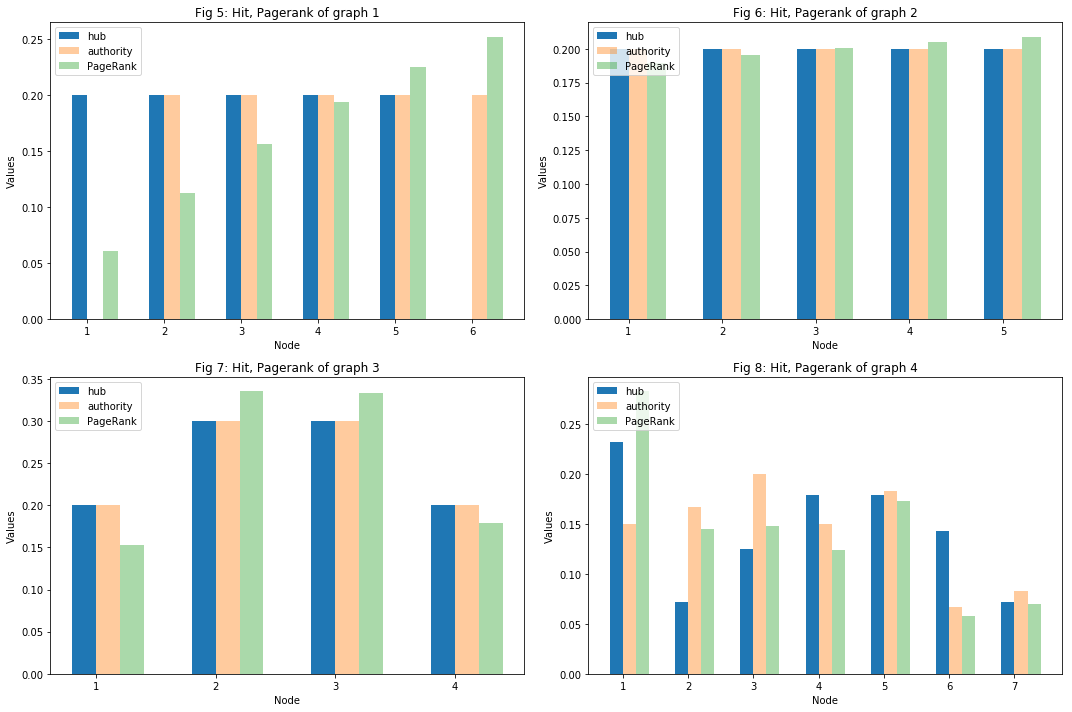

In [172]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
def show_basic_results(graph_id, labels, title, ax):
    legends = ['hub', 'authority', 'PageRank']

    base_path = 'exp/graph_' + str(graph_id)
    result = pd.read_csv(base_path + '/origin.csv')

    x = result['node']
    y_1 = result['hubs']
    y_2 = result['authorities']
    y_3 = result['pagerank']

    bar_width = 0.2
    opacity = 0.4
    ax.bar(x, y_1, bar_width, label='hub')
    ax.bar(x + bar_width, y_2, bar_width, alpha=opacity, label='authority')
    ax.bar(x + bar_width*2, y_3, bar_width, alpha=opacity, label='PageRank')
    
    ax.set_xlabel('Node')
    ax.set_ylabel('Values')
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(labels)
    ax.legend(legends, loc=2)
    ax.set_title(title)

def show_full_results(fig_num):
    label_group = [
        ('1','2','3','4','5','6'),
        ('1','2','3','4','5'),
        ('1','2','3','4'),
        ('1','2','3','4','5','6','7')
    ]

    fig, ax = plt.subplots(2,2,figsize=(15,10))
    index = [[0,0],[0,1],[1,0],[1,1]]

    for graph_id in range(4):
        title = f'Fig {fig_num}: Hit, Pagerank of graph {graph_id+1}'
        labels = label_group[graph_id]
        r = index[graph_id][0]
        c = index[graph_id][1]
        show_basic_results(graph_id+1, labels, title, ax[r,c])
        fig_num += 1


show_full_results(5)
plt.tight_layout()
plt.show()

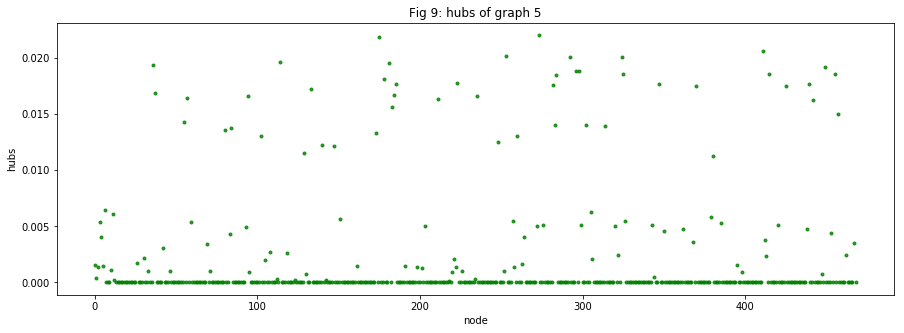

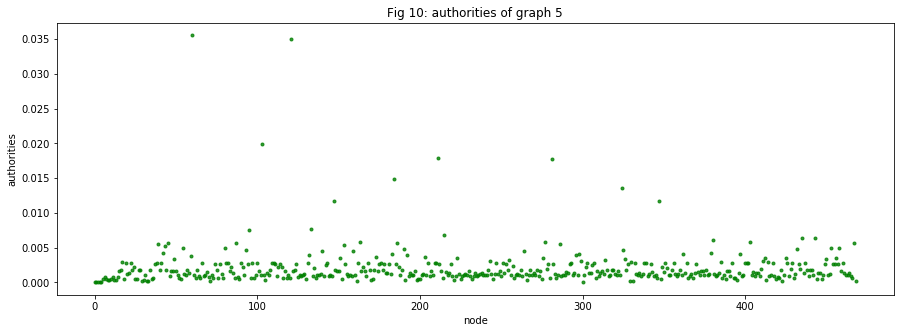

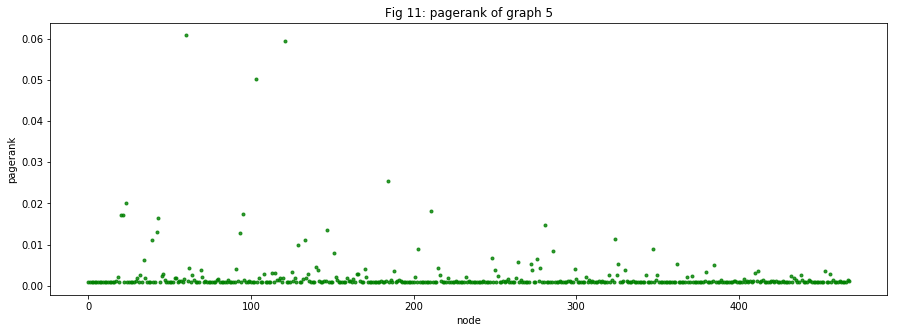

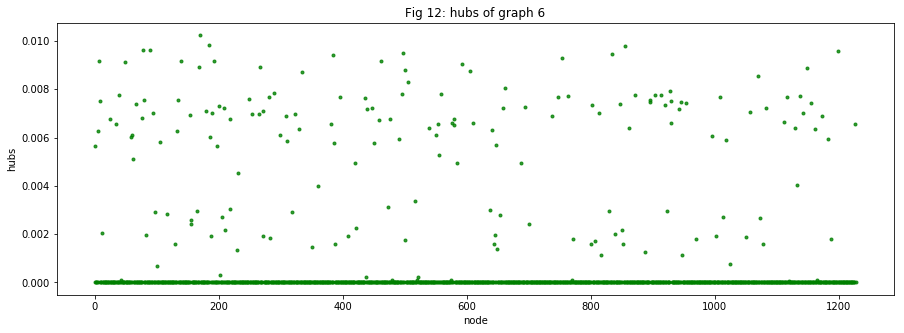

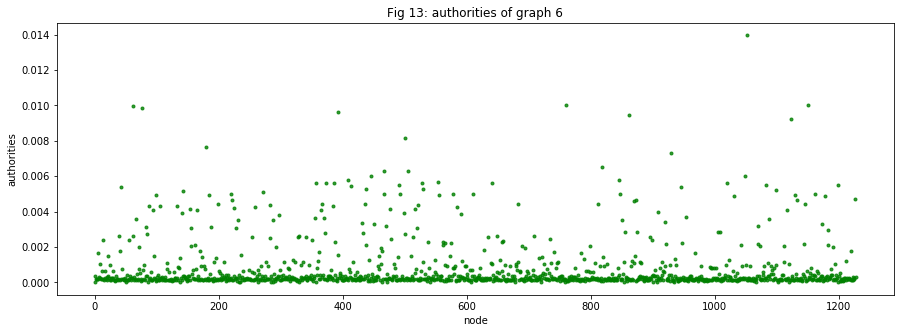

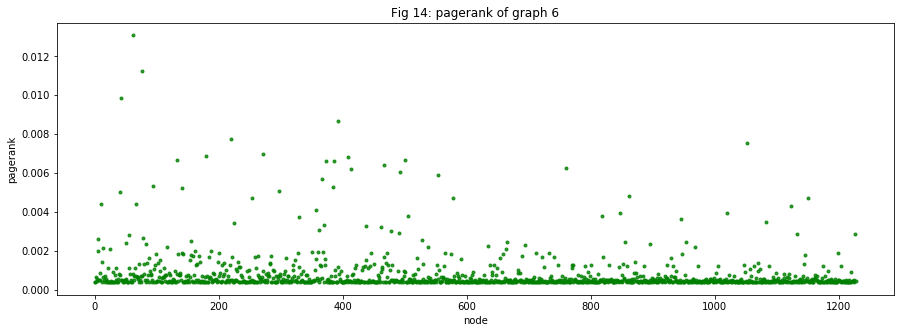

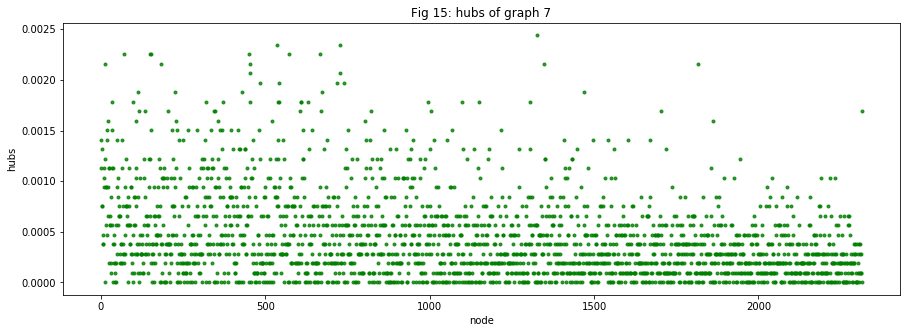

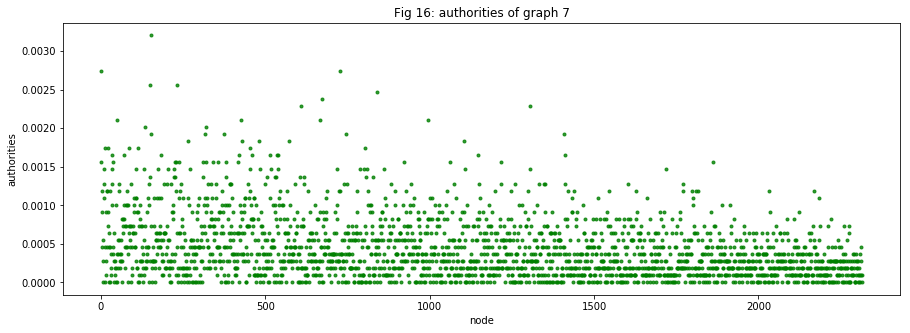

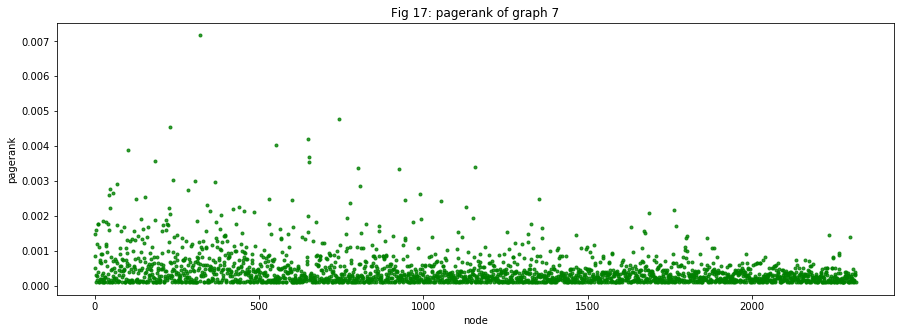

In [211]:
def show_large_results(graph_id, value, title):
    graph = pd.read_csv(f'exp/graph_{graph_id}/origin.csv')
    plt.figure(figsize=(15, 5))
    x = graph['node']
    y = graph[value]
    plt.xlabel('node')
    plt.ylabel(value)
    plt.title(title);
    plt.plot(x, y, 'g.', alpha=0.8)
    plt.show()

def show_all_large_results(fig_num):
    values = ['hubs', 'authorities', 'pagerank']
    for graph_id in range(3):
        for value in values:
            title = f'Fig {fig_num}: {value} of graph {graph_id+5}'
            show_large_results(graph_id+5, value, title)
            fig_num += 1


show_all_large_results(9)

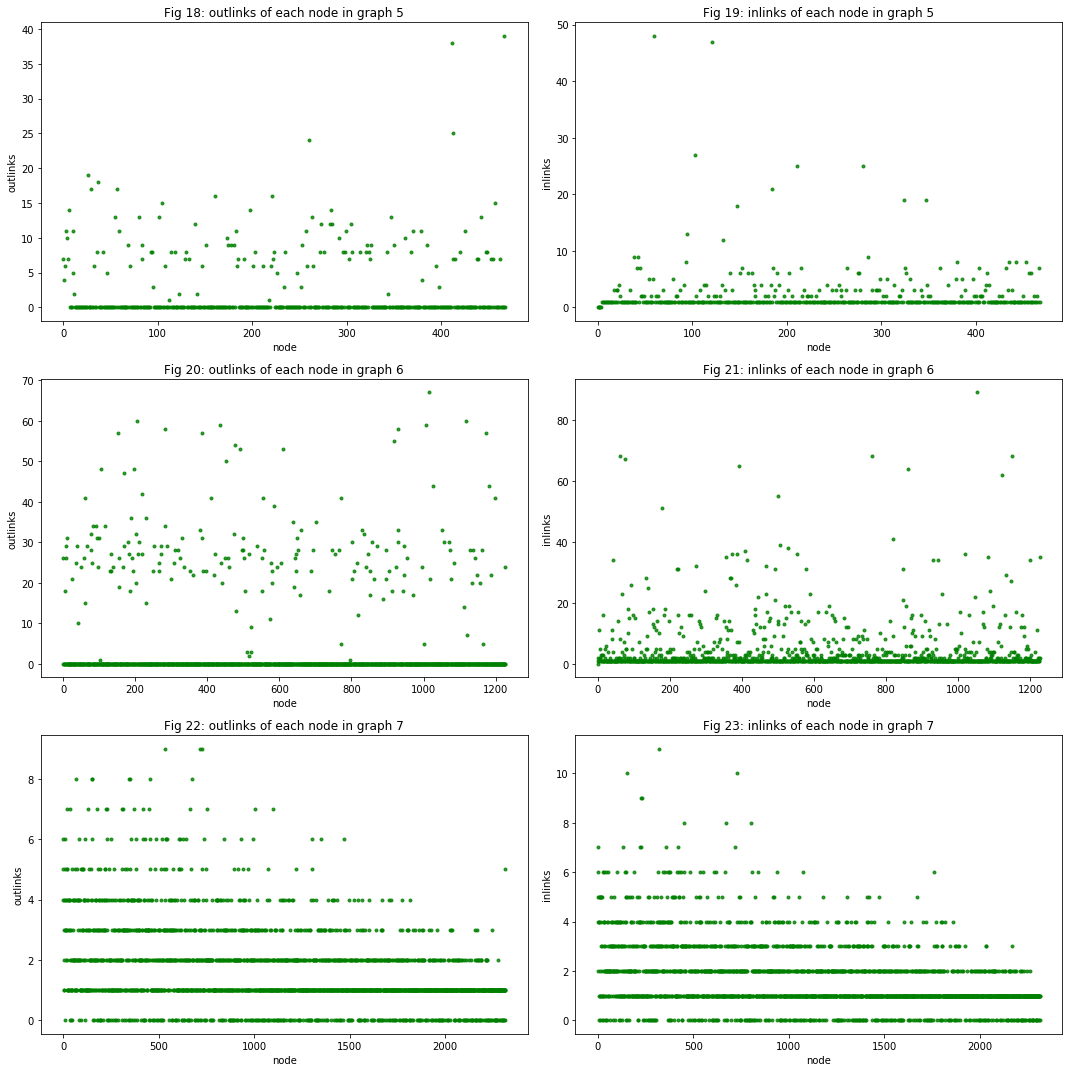

In [210]:

# show inlinks counts & outlinks counts of nodes
def show_counts(graph_id, value, title, index):
    counts = pd.read_csv(f'exp/graph_{graph_id}/link_counts.csv')
    plt.subplot(index)
    x = counts.shape[0]
    y = counts[value]
    plt.xlabel('node')
    plt.ylabel(value)
    plt.title(title);
    plt.plot(range(x), y, 'g.', alpha=0.8)

def show_all_counts(fig_num):
    values = ['outlinks', 'inlinks']
    index = 321
    for graph_id in range(3):
        for value in values:
            title = f'Fig {fig_num}: {value} of each node in graph {graph_id+5}'
            show_counts(graph_id+5, value, title, index)
            fig_num += 1
            index += 1

plt.figure(figsize=(15, 15))
show_all_counts(18)
plt.tight_layout()
plt.show()



### 4.1 HITS & Page Rank Results


Graph 1 為單向 Graph, 從 Fig.5 可觀察到其 Hub 與 Authority 除沒有 child 或 parent 的 node 之外皆相同，而 PageRank 則因為 damping 項的關係，parents 越多則 page rank 越高。

Graph 2 為單向有環的 Graph，從 Fig.6中可發現 其 Hub 與 Authority 由於 node 等價數值皆相同，PageRank 數值雖從圖表上有些微差異，但這是因為 recursive 趨近的關係，其PageRank數值最終將會相同。

Graph 3 則是多環的 Graph, 從 Fig.7看來其中連接最多的 node 2, node 3 有最高的 hub, authority 與 PageRank。

Graph 4 則是多環且較複雜的 Graph，從 Fig.8可得其中 inlinks 與 outlinks 數目最多的 node 1 有最高的 hub 與 PageRank 值，而僅有單一 parent 與 child 的 node 7 其數值皆最低，而 node 3 的 Authority 最高，原因是其所被連接 node 4, 5, 1 其 hub 數值相對較高的。

Graph 5 node 數目達到 460，Edge 數目達到 1100，從 Fig.9,10 可以觀察到絕大多數的 node Authority 較低，hub 則較無這種現象，可以推測這些 hub 較高的 node 其所連接的 node 通常集中在少數 node，而這點也從 Fig.19 Graph 5 每個 node 的 inlinks 數目圖中證實。
而 PageRank 的數值高低則與 Authority 大致符合。

Graph 6 node 數目進一步提高到 1228, edge 數則到達 5220，


Graph 7 採用 IBM 合成資料，


### 4.2 SimRank Results


#### a. Graph 1


#### b. Graph 2


#### c. Graph 3


#### d. Graph 4


#### e. Graph 5


### 4.3 Methods to Increase hub, authority,  and PageRank

本小節嘗試透過增減 links 與 nodes 來增加 node 1 的 hub, authority, and PageRank。


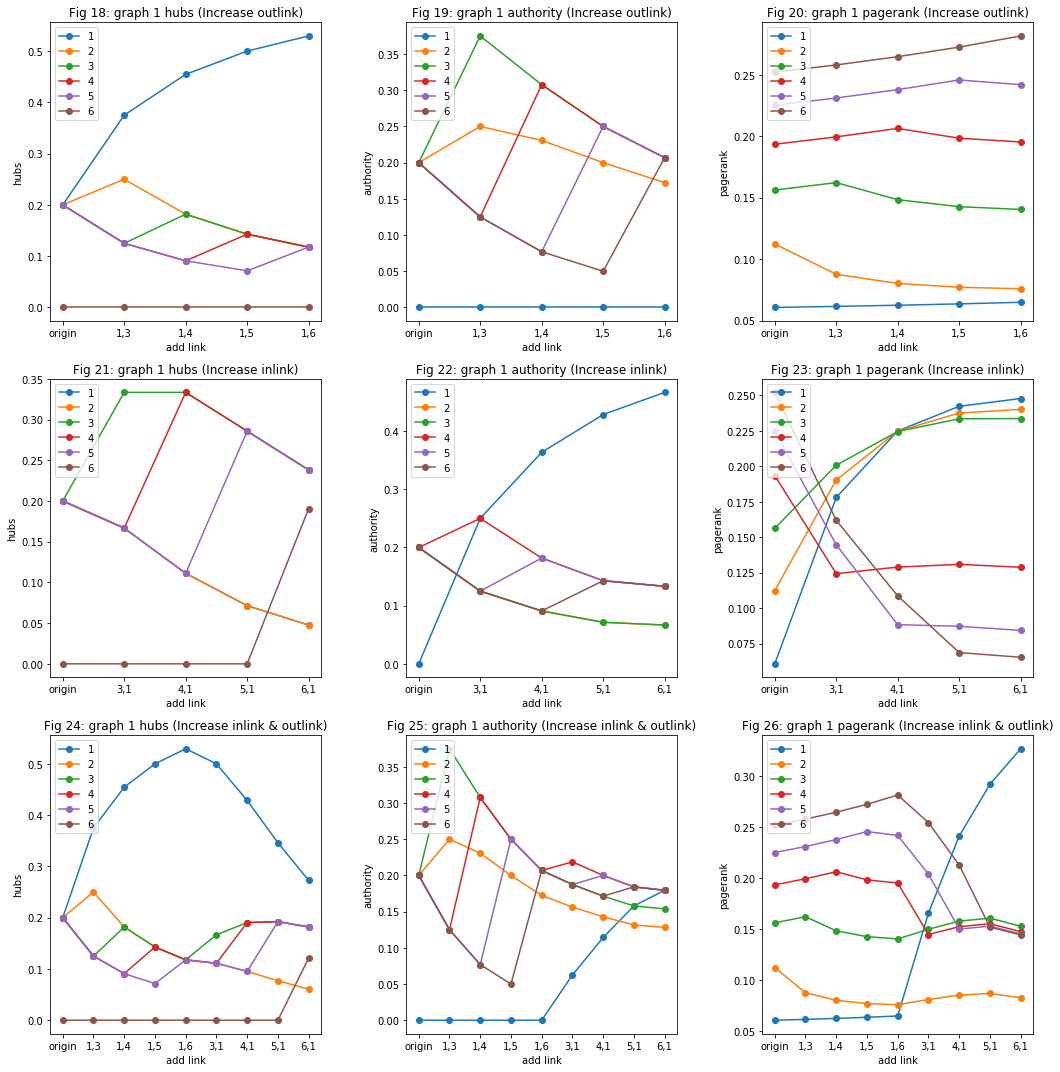

In [193]:

plt.figure(figsize=(15, 15))
def get_increase_exp_data(graph_id):
    base_path = f'exp/graph_{graph_id}'
    return {
        'in': {
            'hubs': pd.read_csv(base_path + '/in/hubs.csv'),
            'authority': pd.read_csv(base_path + '/in/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/in/pagerank.csv'),
        },
        'out': {
            'hubs': pd.read_csv(base_path + '/out/hubs.csv'),
            'authority': pd.read_csv(base_path + '/out/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/out/pagerank.csv'),
        },
        'both': {
            'hubs': pd.read_csv(base_path + '/both/hubs.csv'),
            'authority': pd.read_csv(base_path + '/both/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/both/pagerank.csv'),
        }
    }

# plot single figure
def show_results(data, link_type, f1_config, index):
    value = f1_config['value']
    legends = f1_config['legends']
    title = f1_config['title']
    
    plt.subplot(index)
    x = list(data[link_type][value]['add_link'])
    x[0] = 'origin'

    # plot exp results
    for legend in legends:
        real_node = str(int(legend) - 1)
        y = data[link_type][value][real_node]
        plt.plot(x, y, 'o-')
    
    plt.xlabel('add link')
    plt.ylabel(value)
    plt.legend(legends, loc=2);
    plt.title(title);

# plot 9 figure
def show_graph_results(legends, graph_id, fig_num):
    link_type = ['out', 'in', 'both']
    values = ['hubs', 'authority', 'pagerank']
    add_types = ['out', 'in', 'both']
    add_links = ['outlink', 'inlink', 'inlink & outlink']

    data = get_increase_exp_data(graph_id)
    f_index = 331
    for type_id, add_type in enumerate(add_types):
        for id, value in enumerate(values):
           
            f_config = {
                'value': value,
                'legends': legends,
                'title': f'Fig {fig_num}: graph {graph_id} {value} (Increase {add_links[type_id]})'
            }
            show_results(data, add_type, f_config, str(f_index))
            fig_num += 1
            f_index += 1
        
#
# Fig 1 ~ Fig 9
#

legends = ['1','2','3','4','5','6']
show_graph_results(legends, 1, 18)

# Plot
plt.tight_layout()
plt.show()


#### a. Graph 1

此 graph 有 6 個 node，5 個 link，若不增減 node，則最多可再增加 25 條 link。

##### Increase outlinks of node 1
以 hub 為例，其 outlinks 且外連 node 的 authority 越高則 hub 越高。

若不斷增加 node 1 的 outlinks 數目，我們的確可以觀察到其 hub 數值隨之增加

Fig . 為增加 link 的結果，在原本的 graph 中，依序增加 '1,3', '1,4', '1,5', '1,6' 等link後各 node 的 hub 數值變化


...

此外也可以觀察到若只增加 node 1 的 outlink，則其 hub 的數值僅與外連 node 的數目有關，而與其外連的對象無關。

從 Fig . & Fig . 也可看到，在只增加 node 1 outlink 的情況下，其 authorities 並沒有變化，維持為 0，但 PageRank 會少量增加。

#####  Increase inlinks of node 1

Fig . 則是在原本的 graph 中，依序增加 '3,1', '4,1', '5,1', '6,1' 等link後各 node 的 hub 數值變化

...

從 Fig . & Fig 可發現，hub 會隨者 inlink 的數目增加而減少，但 PageRank 則會增加。

#####  Increase both outlinks & inlinks of node 1

實驗也比較兩種 link 同時增加的情況，若依序增加 '1,3', '1,4', '1,5', '1,6', '3,1', '4,1', '5,1', '6,1' 等link後

...

從 Fig . & Fig 可發現，node 1 的 hub 先增加後減少。 而 PageRank 在 inlink 加入後則會增加，最終達到只比增加 inlink 還高的數值。



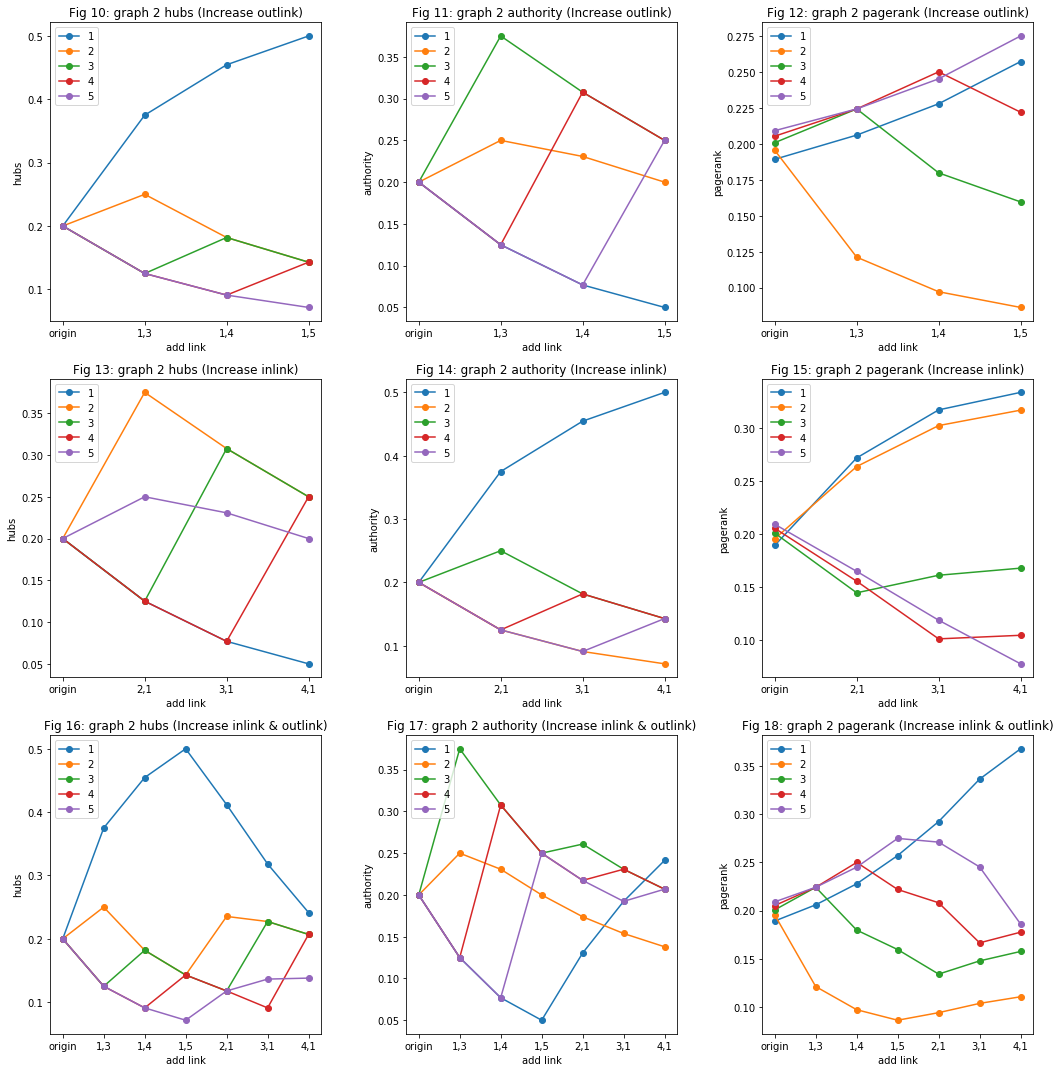

In [65]:
# Fig 10 ~ Fig 18
legends = ['1','2','3','4','5']
plt.figure(figsize=(15, 15))
show_graph_results(legends, 2, 10)

# Plot
plt.tight_layout()
plt.show()


#### b. Graph 2

#####  Increase outlinks of node 1

#####  Increase inlinks of node 1

#####  Increase both outlinks & inlinks of node 1

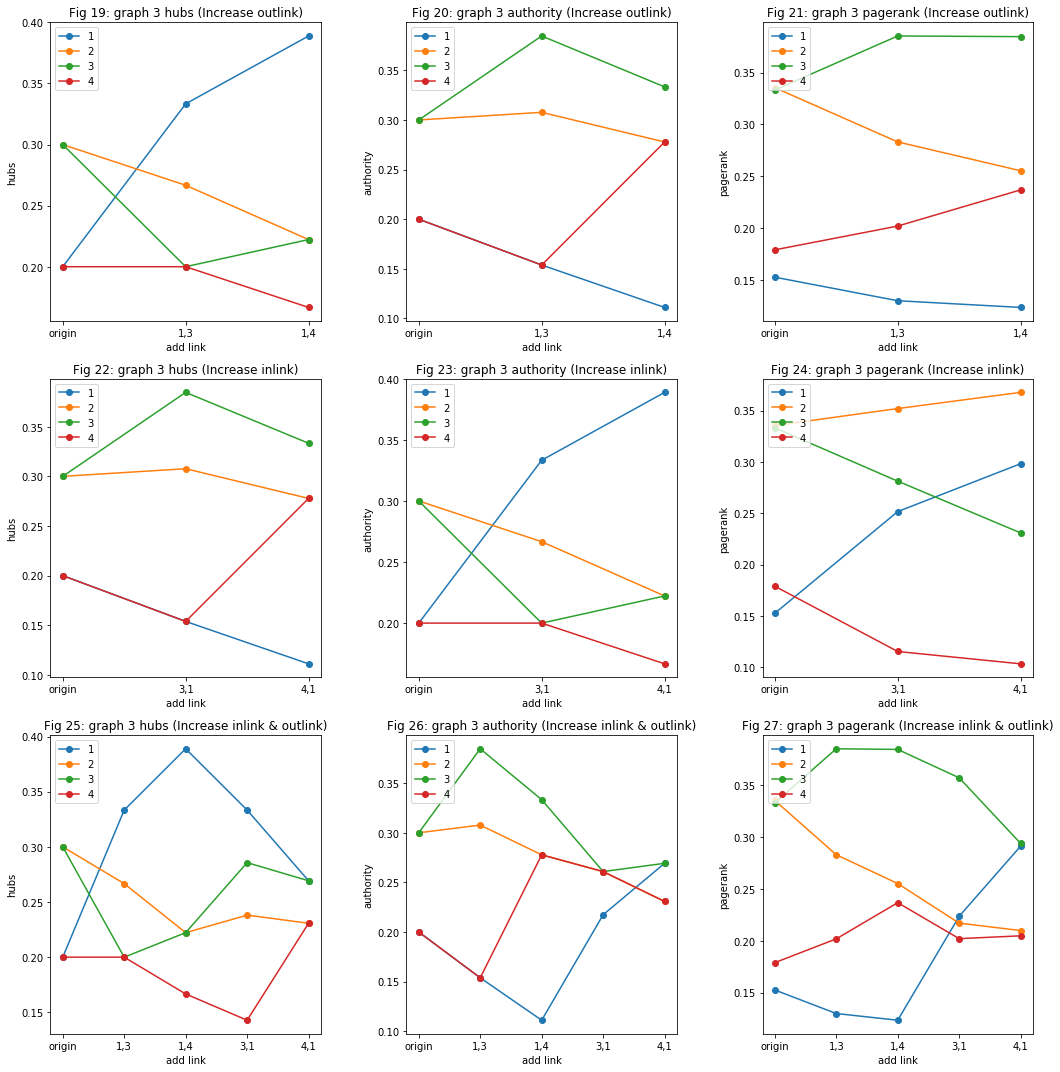

In [63]:
# Fig 19 ~ Fig 27
legends = ['1','2','3','4']
plt.figure(figsize=(15, 15))
show_graph_results(legends, 3, 19)

# Plot
plt.tight_layout()
plt.show()

#### c. Graph 3

##### Increase outlinks of node 1

#####  Increase inlinks of node 1

#####  Increase both outlinks & inlinks of node 1


### 4.4 Performance

## 5. Conclusion


## 6. References

- [] Glen Jeh, Jennifer Widom. SimRank: A Measure of Structural-Context Similarity